In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read dataset

videos_emotion = pd.read_csv("data/desc_depth_videos_emotion.csv")
videos_emotion

,title,video_id,url,channel,parent_id,parent,depth,lang,description,desc_emotion,desc_score
0,China Navy to BBC: 'Stay away from islands' - ...,LVeKbEgn50o,https://www.youtube.com/watch?v=LVeKbEgn50o,BBC News,nbBsh46aSz4,https://www.youtube.com/watch?v=nbBsh46aSz4,1,en,Countries from around the world have insisted ...,anger,0.991604
1,"Nike, H&M face backlash in China over Uighur s...",qC_qOoBFsMc,https://www.youtube.com/watch?v=qC_qOoBFsMc,DW News,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,A furious China is lashing out against global ...,anger,0.951949
2,What do you do when someone just doesn't like ...,Y4gly9n9RBo,https://www.youtube.com/watch?v=Y4gly9n9RBo,TEDx Talks,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,What do you do when someone just doesn't like ...,anger,0.963195
3,99 Years Later... We Solved It,JFFhD5HeByM,https://www.youtube.com/watch?v=JFFhD5HeByM,Physics Girl,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,How do these rocks move on their own in the de...,joy,0.698618
4,"Elon Musk talks Twitter, Tesla and how his bra...",cdZZpaB2kDM,https://www.youtube.com/watch?v=cdZZpaB2kDM,TED,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,In this unedited conversation with head of TED...,sadness,0.998579
...,...,...,...,...,...,...,...,...,...,...,...
14327,The art of focus – a crucial ability | Christi...,xF80HzqvAoA,https://www.youtube.com/watch?v=xF80HzqvAoA,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,How do you bring out the best in yourself? Acc...,joy,0.942071
14328,Why We Fear And Hold Back From What We Want | ...,tFDRXgDUea4,https://www.youtube.com/watch?v=tFDRXgDUea4,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,Why are we constantly holding ourselves back f...,joy,0.997017
14329,5 steps to designing the life you want | Bill ...,SemHh0n19LA,https://www.youtube.com/watch?v=SemHh0n19LA,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,Designers spend their days dreaming up better ...,joy,0.975369
14330,Master Shi Heng Yi – 5 hindrances to self-mast...,4-079YIasck,https://www.youtube.com/watch?v=4-079YIasck,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,Meet Shaolin Master Shi Heng Yi in his serene ...,joy,0.997832


In [3]:
# Calculates the normalized emotion proportions for each depth.

def calculate_label_means(df):
    
    # Find how many depth level are there.
    depth_num = df.depth.nunique()
    emotion_label_means = []
    
    # For each depth find the normalized mean of emotions
    for i in range(depth_num):
        # Store as dictionary
        emotion_label_means.append(df[df['depth'] == i+1]['desc_emotion'].value_counts(normalize=True).to_dict())
        # Add depth level to the dictionary.
        emotion_label_means[i]['depth'] = i+1
    return emotion_label_means

In [4]:
# Example of emotion means for each depth
emotion_label_means = calculate_label_means(videos_emotion)
emotion_label_means

[{'anger': 0.3673469387755102,
  'joy': 0.2857142857142857,
  'sadness': 0.22448979591836735,
  'fear': 0.12244897959183673,
  'depth': 1},
 {'joy': 0.46938775510204084,
  'anger': 0.3741496598639456,
  'fear': 0.06802721088435375,
  'sadness': 0.047619047619047616,
  'love': 0.02040816326530612,
  'surprise': 0.02040816326530612,
  'depth': 2},
 {'joy': 0.5578947368421052,
  'anger': 0.2887218045112782,
  'fear': 0.07368421052631578,
  'sadness': 0.05413533834586466,
  'love': 0.015037593984962405,
  'surprise': 0.010526315789473684,
  'depth': 3},
 {'joy': 0.640117994100295,
  'anger': 0.22971976401179942,
  'fear': 0.05383480825958702,
  'sadness': 0.04387905604719764,
  'surprise': 0.016592920353982302,
  'love': 0.015855457227138645,
  'depth': 4},
 {'joy': 0.6585184496700437,
  'anger': 0.17427270192397062,
  'sadness': 0.08272144251324473,
  'fear': 0.0583697369644019,
  'surprise': 0.015057161446231062,
  'love': 0.011060507482108002,
  'depth': 5}]

In [5]:
# Transform Emotion Dictionary to Emotion Dataframe

def create_df_emotions(mean_arr):
    # Create dataframe
    df_emotions = pd.DataFrame(mean_arr)
    # Give column names
    df_emotions = df_emotions[["depth", "anger","joy","fear","sadness","surprise","love"]]
    df_emotions.fillna(0, inplace = True)
    return df_emotions

In [6]:
df_emotions = create_df_emotions(emotion_label_means)
df_emotions

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.367347,0.285714,0.122449,0.224490,0.000000,0.000000
1,2,0.374150,0.469388,0.068027,0.047619,0.020408,0.020408
2,3,0.288722,0.557895,0.073684,0.054135,0.010526,0.015038
3,4,0.229720,0.640118,0.053835,0.043879,0.016593,0.015855
4,5,0.174273,0.658518,0.058370,0.082721,0.015057,0.011061


In [7]:
# Drawing emotions with depth-emotion score

def draw_emotions(df, title):
    ax = df.plot(x="depth", figsize=(8,8));
    # Depth levels
    ax.set_xticks([1,2,3,4,5]);
    ax.set_title(title)
    ax.set_ylabel("Emotion Score");

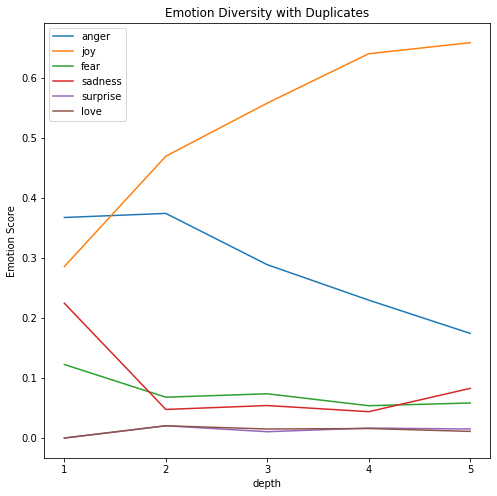

In [8]:
draw_emotions(df_emotions, "Emotion Diversity with Duplicates")

## Adding Emotion Scores as Weight

In [12]:
# Calculate normalized emotion prediction scores 

def calculate_score_means(df):
    
    # Find no. depth levels
    depth_num = df.depth.nunique()
    emotion_score_means = []

    # For each depth find the mean of prediction scores.
    for i in range(depth_num):
        # Store as dictionary
        emotion_score_means.append(df[df['depth'] == i+1].groupby('desc_emotion')['desc_score'].mean().to_dict())
    return emotion_score_means

In [13]:
# Example of prediction means
emotion_score_means = calculate_score_means(videos_emotion)
emotion_score_means

[{'anger': 0.783430298169454,
  'fear': 0.7454324265321096,
  'joy': 0.9119867895330701,
  'sadness': 0.9485479539090936},
 {'anger': 0.7783110829916867,
  'fear': 0.6714701890945435,
  'joy': 0.8647070829419122,
  'love': 0.9821199774742125,
  'sadness': 0.8276969875608172,
  'surprise': 0.9366443554560343},
 {'anger': 0.8148059160448611,
  'fear': 0.7479786422787881,
  'joy': 0.89278115641396,
  'love': 0.9418968677520752,
  'sadness': 0.8975707168380419,
  'surprise': 0.8061827932085309},
 {'anger': 0.8042795291681734,
  'fear': 0.7199401951407733,
  'joy': 0.8989861944201081,
  'love': 0.9236802001332127,
  'sadness': 0.8179290915737633,
  'surprise': 0.8180327157179514},
 {'anger': 0.8067705034891764,
  'fear': 0.7595534177058062,
  'joy': 0.8997921010096812,
  'love': 0.8929351748538619,
  'sadness': 0.9035606316636118,
  'surprise': 0.8087934132343457}]

In [14]:
# Normalizes data. Specifically the total sum of each value sums up to 1.
def NormalizeData(arr):
    data_sum = np.sum(arr)
    return arr/data_sum

In [15]:
# Add weight to the emotion labels scores using prediction scores.
def multiple_means(emotion_mean1, emotion_mean2):
    emotion_depths = []
    
    # For each depth:
    for depth_level,depth_means in enumerate(emotion_mean1):

        label_and_scores = {}
        unnormalized_data = []
        
        # For each emotion label in that depth:
        for emotion in depth_means:
            
            # Multiply emotion label mean score with its prediction scores.
            unnormalized_data.append(emotion_mean1[depth_level][emotion]*emotion_mean2[depth_level][emotion])
        
        # Normalize the new scores.
        normalized_scores = NormalizeData(unnormalized_data)
        
        # Create new dictionary and add labels and normalized scores.
        for emotion, score in zip(depth_means, normalized_scores):
            label_and_scores[emotion] = score

        # Add depth level to the new dictionary.
        label_and_scores["depth"] = depth_level + 1
        emotion_depths.append(label_and_scores)
    return emotion_depths

In [16]:
# Example of weighted emotion scores
emotion_depths = multiple_means(emotion_score_means, emotion_label_means)
emotion_depths

[{'anger': 0.33755466709442505,
  'fear': 0.10706087283381613,
  'joy': 0.3056242647782559,
  'sadness': 0.24976019529350307,
  'depth': 1},
 {'anger': 0.3545490642450143,
  'fear': 0.05561438967350565,
  'joy': 0.49417246866943954,
  'love': 0.024403169650929167,
  'sadness': 0.047987691012622014,
  'surprise': 0.02327321674848933,
  'depth': 2},
 {'anger': 0.2736494531312192,
  'fear': 0.06410980553236773,
  'joy': 0.5793728062595814,
  'love': 0.016475649145068706,
  'sadness': 0.056521067848644746,
  'surprise': 0.009871218083118187,
  'depth': 3},
 {'anger': 0.21406855704540467,
  'fear': 0.04490628178423771,
  'joy': 0.6667462215529212,
  'love': 0.016968674143872018,
  'sadness': 0.04158344219787952,
  'surprise': 0.01572682327568497,
  'depth': 4},
 {'anger': 0.16081933896651174,
  'fear': 0.05071132465031763,
  'joy': 0.6777492099399448,
  'love': 0.01129675946503758,
  'sadness': 0.0854937360622909,
  'surprise': 0.013929630915897377,
  'depth': 5}]

In [17]:
df_emotions_weighted = create_df_emotions(emotion_depths)
df_emotions_weighted

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.337555,0.305624,0.107061,0.249760,0.000000,0.000000
1,2,0.354549,0.494172,0.055614,0.047988,0.023273,0.024403
2,3,0.273649,0.579373,0.064110,0.056521,0.009871,0.016476
3,4,0.214069,0.666746,0.044906,0.041583,0.015727,0.016969
4,5,0.160819,0.677749,0.050711,0.085494,0.013930,0.011297


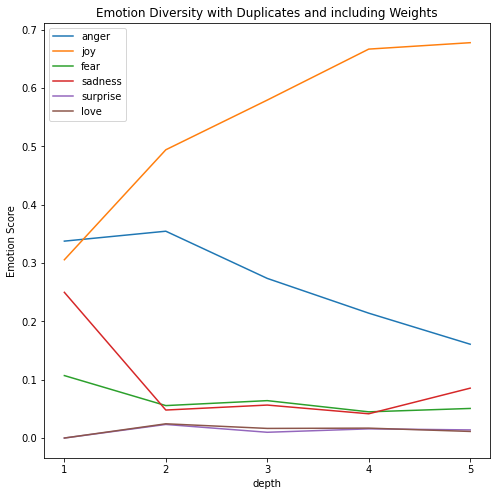

In [18]:
draw_emotions(df_emotions_weighted, "Emotion Diversity with Duplicates and including Weights")

## Analysing the Data Without Duplicates

In [19]:
# Keep the first original video titles by looking at video_id. 
no_dub_videos_emotion = videos_emotion.drop_duplicates(subset= "video_id", keep='first', inplace=False, ignore_index = True)
no_dub_videos_emotion

,title,video_id,url,channel,parent_id,parent,depth,lang,description,desc_emotion,desc_score
0,China Navy to BBC: 'Stay away from islands' - ...,LVeKbEgn50o,https://www.youtube.com/watch?v=LVeKbEgn50o,BBC News,nbBsh46aSz4,https://www.youtube.com/watch?v=nbBsh46aSz4,1,en,Countries from around the world have insisted ...,anger,0.991604
1,"Nike, H&M face backlash in China over Uighur s...",qC_qOoBFsMc,https://www.youtube.com/watch?v=qC_qOoBFsMc,DW News,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,A furious China is lashing out against global ...,anger,0.951949
2,What do you do when someone just doesn't like ...,Y4gly9n9RBo,https://www.youtube.com/watch?v=Y4gly9n9RBo,TEDx Talks,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,What do you do when someone just doesn't like ...,anger,0.963195
3,99 Years Later... We Solved It,JFFhD5HeByM,https://www.youtube.com/watch?v=JFFhD5HeByM,Physics Girl,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,How do these rocks move on their own in the de...,joy,0.698618
4,"Elon Musk talks Twitter, Tesla and how his bra...",cdZZpaB2kDM,https://www.youtube.com/watch?v=cdZZpaB2kDM,TED,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,In this unedited conversation with head of TED...,sadness,0.998579
...,...,...,...,...,...,...,...,...,...,...,...
5606,Freedom from Self-Doubt | B.J. Davis | TEDxSac...,SaQQVevhZEM,https://www.youtube.com/watch?v=SaQQVevhZEM,TEDx Talks,v1ojZKWfShQ,https://www.youtube.com/watch?v=v1ojZKWfShQ,5,en,"A former felon, turned doctor, clinical direct...",joy,0.985614
5607,Listen to the Monster in Your Closet | Star Ha...,qjzvH2wrpDg,https://www.youtube.com/watch?v=qjzvH2wrpDg,TEDx Talks,WiVHSRY2I5Y,https://www.youtube.com/watch?v=WiVHSRY2I5Y,5,en,"Certified Professional Organizer®, Star Hansen...",joy,0.976571
5608,How Clothes Impact Your Life: Re-examining Fas...,it18TxNiGZc,https://www.youtube.com/watch?v=it18TxNiGZc,TEDx Talks,WiVHSRY2I5Y,https://www.youtube.com/watch?v=WiVHSRY2I5Y,5,en,"We all wear clothes, but does what we wear mat...",joy,0.981878
5609,Why We Fear And Hold Back From What We Want | ...,tFDRXgDUea4,https://www.youtube.com/watch?v=tFDRXgDUea4,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,Why are we constantly holding ourselves back f...,joy,0.997017


In [20]:
# Example of emotion means for each depth
no_dub_emotion_label_means = calculate_label_means(no_dub_videos_emotion)
no_dub_emotion_label_means

[{'anger': 0.4074074074074074,
  'joy': 0.37037037037037035,
  'sadness': 0.1111111111111111,
  'fear': 0.1111111111111111,
  'depth': 1},
 {'joy': 0.5327102803738317,
  'anger': 0.3177570093457944,
  'fear': 0.056074766355140186,
  'sadness': 0.037383177570093455,
  'love': 0.028037383177570093,
  'surprise': 0.028037383177570093,
  'depth': 2},
 {'joy': 0.6096256684491979,
  'anger': 0.27807486631016043,
  'fear': 0.058823529411764705,
  'sadness': 0.0374331550802139,
  'surprise': 0.008021390374331552,
  'love': 0.008021390374331552,
  'depth': 3},
 {'joy': 0.6805135951661632,
  'anger': 0.20694864048338368,
  'fear': 0.04154078549848943,
  'sadness': 0.04154078549848943,
  'surprise': 0.019637462235649546,
  'love': 0.009818731117824773,
  'depth': 4},
 {'joy': 0.722942577401429,
  'anger': 0.14845197142101085,
  'sadness': 0.05213019317279704,
  'fear': 0.04525006615506748,
  'surprise': 0.01878803916379995,
  'love': 0.01243715268589574,
  'depth': 5}]

In [21]:
# Create Dataframe
no_dub_df_emotions = create_df_emotions(no_dub_emotion_label_means)
no_dub_df_emotions

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.407407,0.370370,0.111111,0.111111,0.000000,0.000000
1,2,0.317757,0.532710,0.056075,0.037383,0.028037,0.028037
2,3,0.278075,0.609626,0.058824,0.037433,0.008021,0.008021
3,4,0.206949,0.680514,0.041541,0.041541,0.019637,0.009819
4,5,0.148452,0.722943,0.045250,0.052130,0.018788,0.012437


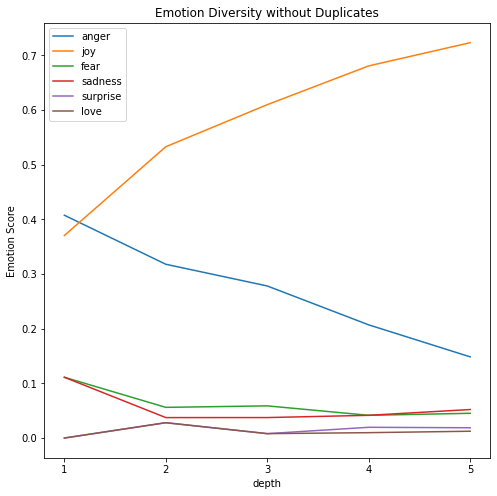

In [22]:
draw_emotions(no_dub_df_emotions, "Emotion Diversity without Duplicates")

## Adding Emotion Scores as Weight to Non-Duplicates

In [23]:
# Example of prediction means
no_dub_emotion_score_means = calculate_score_means(no_dub_videos_emotion)
no_dub_emotion_score_means

[{'anger': 0.8315723700956865,
  'fear': 0.8647077679634094,
  'joy': 0.9099446773529053,
  'sadness': 0.9170846541722616},
 {'anger': 0.7770496966207728,
  'fear': 0.6664770046869913,
  'joy': 0.8740764908623277,
  'love': 0.9821199774742125,
  'sadness': 0.7302236557006836,
  'surprise': 0.9366443554560343},
 {'anger': 0.8042930934864742,
  'fear': 0.7772470577196642,
  'joy': 0.8959157278663233,
  'love': 0.8435585300127665,
  'sadness': 0.8405876478978566,
  'surprise': 0.638129711151123},
 {'anger': 0.7883400911614843,
  'fear': 0.7311163268306039,
  'joy': 0.900805215592125,
  'love': 0.828503471154433,
  'sadness': 0.7799131599339572,
  'surprise': 0.780791781269587},
 {'anger': 0.7525116828354922,
  'fear': 0.7476804050785756,
  'joy': 0.8906074911028714,
  'love': 0.8227973060405,
  'sadness': 0.7926009869212427,
  'surprise': 0.7430824280624658}]

In [24]:
# Example of weighted emotion scores
no_dub_emotion_depths = multiple_means(no_dub_emotion_score_means, no_dub_emotion_label_means)
no_dub_emotion_depths

[{'anger': 0.38772675062772216,
  'fear': 0.10995719298164944,
  'joy': 0.38569856082119386,
  'sadness': 0.11661749556943463,
  'depth': 1},
 {'anger': 0.29712386891916115,
  'fear': 0.044972419102232056,
  'joy': 0.5603174197778045,
  'love': 0.03313566028912617,
  'sadness': 0.032849269668809564,
  'surprise': 0.03160136224286672,
  'depth': 2},
 {'anger': 0.2603959900515329,
  'fear': 0.05323146036407038,
  'joy': 0.6358997014530123,
  'love': 0.00787812902822041,
  'sadness': 0.036635122913539285,
  'surprise': 0.005959596189624784,
  'depth': 3},
 {'anger': 0.18917812996998382,
  'fear': 0.035217289220555684,
  'joy': 0.7108245767306437,
  'love': 0.009432882760251636,
  'sadness': 0.037567793677073094,
  'surprise': 0.01777932764149203,
  'depth': 4},
 {'anger': 0.13067007610111653,
  'fear': 0.03957420009731896,
  'joy': 0.7531250182010808,
  'love': 0.011969906416292487,
  'sadness': 0.04833045357001821,
  'surprise': 0.01633034561417301,
  'depth': 5}]

In [25]:
no_dub_df_emotions_weighted = create_df_emotions(no_dub_emotion_depths)
no_dub_df_emotions_weighted

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.387727,0.385699,0.109957,0.116617,0.000000,0.000000
1,2,0.297124,0.560317,0.044972,0.032849,0.031601,0.033136
2,3,0.260396,0.635900,0.053231,0.036635,0.005960,0.007878
3,4,0.189178,0.710825,0.035217,0.037568,0.017779,0.009433
4,5,0.130670,0.753125,0.039574,0.048330,0.016330,0.011970


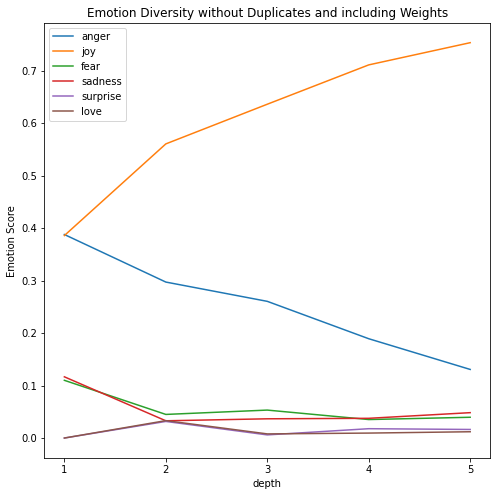

In [26]:
draw_emotions(no_dub_df_emotions_weighted, "Emotion Diversity without Duplicates and including Weights")